# imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.spatial.distance import cdist
import h5py
import torch as tr
!pip install umap-learn
import umap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 1.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
rnafm_emb_name = 'rnafm'
rinalmo_emb_name = 'RiNALMo'
rnaernie_emb_name = 'RNAErnie'
rnabert_emb_name = 'rnabert'
rnamsm_emb_name = 'rna-msm'
ernierna_emb_name = 'ERNIE-RNA'
one_hot_emb_name = 'one-hot'

rinalmo_embeddings_path=f'drive/MyDrive/LLM-RNA/rna_embeddings/{rinalmo_emb_name}_ArchiveII.h5'
rinalmo_fig_path=f'drive/MyDrive/LLM-RNA/doc/umap/{rinalmo_emb_name}-v3.svg'

ernierna_embeddings_path=f'drive/MyDrive/LLM-RNA/rna_embeddings/{ernierna_emb_name}_ArchiveII.h5'
ernierna_fig_path=f'drive/MyDrive/LLM-RNA/doc/umap/{ernierna_emb_name}-v3.svg'

rnafm_embeddings_path=f'drive/MyDrive/LLM-RNA/rna_embeddings/{rnafm_emb_name}_ArchiveII.h5'
rnafm_fig_path=f'drive/MyDrive/LLM-RNA/doc/umap/{rnafm_emb_name}-v3.svg'

one_hot_embeddings_path=f'drive/MyDrive/LLM-RNA/rna_embeddings/{one_hot_emb_name}_ArchiveII.h5'
one_hot_fig_path=f'drive/MyDrive/LLM-RNA/doc/umap/{one_hot_emb_name}-v3.svg'

rnabert_embeddings_path=f'drive/MyDrive/LLM-RNA/rna_embeddings/{rnabert_emb_name}_ArchiveII.h5'
rnabert_fig_path=f'drive/MyDrive/LLM-RNA/doc/umap/{rnabert_emb_name}-v3.svg'

rnaernie_embeddings_path=f'drive/MyDrive/LLM-RNA/rna_embeddings/{rnaernie_emb_name}_ArchiveII.h5'
rnaernie_fig_path=f'drive/MyDrive/LLM-RNA/doc/umap/{rnaernie_emb_name}-v3.svg'

rnamsm_embeddings_path=f'drive/MyDrive/LLM-RNA/rna_embeddings/{rnamsm_emb_name}_ArchiveII.h5'
rnamsm_fig_path=f'drive/MyDrive/LLM-RNA/doc/umap/{rnamsm_emb_name}-v3.svg'

In [ ]:
rinalmo_id_to_embedding_seq = h5py.File(rinalmo_embeddings_path, 'r')
ernierna_id_to_embedding_seq = h5py.File(ernierna_embeddings_path, 'r')
one_hot_id_to_embedding_seq = h5py.File(one_hot_embeddings_path, 'r')
rnabert_id_to_embedding_seq = h5py.File(rnabert_embeddings_path, 'r')
rnafm_id_to_embedding_seq = h5py.File(rnafm_embeddings_path, 'r')
rnaernie_id_to_embedding_seq = h5py.File(rnaernie_embeddings_path, 'r')
rnamsm_id_to_embedding_seq = h5py.File(rnamsm_embeddings_path, 'r')

# calc averages

In [ ]:
def get_umap_proj(id_to_embedding_seq):
  any_embedding = id_to_embedding_seq['tmRNA_Yers.pest._AE017042_1-364'][()]
  n = len(id_to_embedding_seq.keys())
  d = any_embedding.shape[1]
  print(f"there are {n} entries in the dictionary")
  print(f"embedding dimension is {d}")
  average_embeddings = np.zeros((n, d))
  for i, entry in enumerate(id_to_embedding_seq.items()):
      seqid, embedding = entry
      numpy_embedding = embedding[()]
      average_embeddings[i] =  np.mean(numpy_embedding, axis=0)
  umap_model = umap.UMAP(random_state=42, n_components=3)
  return umap_model.fit_transform(average_embeddings)

In [ ]:
rinalmo_proj = get_umap_proj(rinalmo_id_to_embedding_seq)

there are 3864 entries in the dictionary
embedding dimension is 1280


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [ ]:
ernierna_proj = get_umap_proj(ernierna_id_to_embedding_seq)

there are 3864 entries in the dictionary
embedding dimension is 768


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [ ]:
rnafm_proj = get_umap_proj(rnafm_id_to_embedding_seq)

there are 3864 entries in the dictionary
embedding dimension is 640


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [ ]:
rnabert_proj = get_umap_proj(rnabert_id_to_embedding_seq)

there are 3864 entries in the dictionary
embedding dimension is 120


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [ ]:
onehot_proj = get_umap_proj(one_hot_id_to_embedding_seq)

there are 3864 entries in the dictionary
embedding dimension is 4


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [ ]:
rnamsm_proj = get_umap_proj(rnamsm_id_to_embedding_seq)

there are 3864 entries in the dictionary
embedding dimension is 768


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [ ]:
rnaernie_proj = get_umap_proj(rnaernie_id_to_embedding_seq)

there are 3864 entries in the dictionary
embedding dimension is 768


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [ ]:
llm_names = {
    "rna-msm": "RNA-MSM",
    "rnafm": "RNA-FM",
    "rnabert": "RNABERT",
}

In [ ]:
# Extract family name from sequence ID
def get_family_name(sequence_id):
    return sequence_id.split('_')[0]

# Extract sequence IDs for each point
sequence_ids = rinalmo_id_to_embedding_seq.keys()

# Extract family names for each sequence ID
family_names = [get_family_name(sequence_id) for sequence_id in sequence_ids]

unique_families = ['23s', 'telomerase', '16s', 'grp1', 'tmRNA', 'RNaseP', 'tRNA', 'srp', '5s']
# lengths = [15, 35, 65, 74, 462, 454, 557, 914, 1283]

colors = mpl.colormaps['Set1'].colors

for i, color in enumerate(colors):
  print(color)

# for everything but one-hot and RNABERT
colors_ordered = [colors[2] + (1,), colors[3] + (1,), colors[1]+ (1,), colors[4]+ (.5,), colors[0]+ (.5,), colors[5]+ (.5,), colors[7]+ (.1,), colors[6]+ (.1,), colors[8]+ (.1,)]

# # for one-hot and RNABERT
# colors_ordered = [colors[2] + (1,), colors[3] + (1,), colors[1]+ (1,), colors[4]+ (.5,), colors[0]+ (.5,), colors[5]+ (.5,), colors[7]+ (.5,), colors[6]+ (.5,), colors[8]+ (.5,)]

zs = [20, 18, 16, 14, 12, 10, 8, 6, 4]
alphas = [1, 1, 1, 0.5, 0.5, 0.5, 0.2, 0.2, 0.2]

family_colors = {family: color for family, color in zip(unique_families, colors_ordered)}
family_markers = {family: marker for family, marker in zip(unique_families, [".", "x", "d", "^", ".", "x", "d", "^", "."])}
family_zs = {family: z for family, z in zip(unique_families, zs)}
family_alphas = {family: alpha for family, alpha in zip(unique_families, alphas)}
colors = [family_colors[family] for family in family_names]
zs = [family_zs[family] for family in family_names]
alphas = [family_alphas[family] for family in family_names]
markers = ["." for family in family_names]

(0.8941176470588236, 0.10196078431372549, 0.10980392156862745)
(0.21568627450980393, 0.49411764705882355, 0.7215686274509804)
(0.30196078431372547, 0.6862745098039216, 0.2901960784313726)
(0.596078431372549, 0.3058823529411765, 0.6392156862745098)
(1.0, 0.4980392156862745, 0.0)
(1.0, 1.0, 0.2)
(0.6509803921568628, 0.33725490196078434, 0.1568627450980392)
(0.9686274509803922, 0.5058823529411764, 0.7490196078431373)
(0.6, 0.6, 0.6)


In [ ]:
order = np.argsort(zs)

In [ ]:
def plot_embedding(data_points, emb_name, fig_path, save_legend=False):

  # markers
  plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
  fig = plt.figure()
  ax=fig.add_subplot(projection='3d')
  # Hide grid lines
  ax.grid(False)

  ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
  ax.set_axis_off()
  ax.set_ylim(-6.91, 24.93)
  ax.set_xlim(-9.18, 23.48)
  ax.set_zlim(-12.39, 23.63)
  vleng = 22

  i = np.array([vleng, 0, 0])
  j = np.array([0, vleng, 0])
  k = np.array([0, 0, vleng])

  p = np.array([vleng, 0, vleng])
  q = np.array([0, vleng, vleng])
  r = np.array([vleng, vleng, 0])

  ax_color = '0.8'
  ax.plot(*np.vstack([[0,0,0], i]).T, color=ax_color)
  ax.plot(*np.vstack([[0,0,0], j]).T, color=ax_color)
  ax.plot(*np.vstack([[0,0,0], k]).T, color=ax_color)
  ax.plot(*np.vstack([[0,0,vleng], p]).T, color=ax_color)
  ax.plot(*np.vstack([[0,0,vleng], q]).T, color=ax_color)
  ax.plot(*np.vstack([[vleng,0,0], r]).T, color=ax_color)
  ax.plot(*np.vstack([[0,vleng,0], r]).T, color=ax_color)
  ax.plot(*np.vstack([[0,vleng,0], q]).T, color=ax_color)
  ax.plot(*np.vstack([[vleng,0,0], p]).T, color=ax_color)

  ax.view_init(22, 25)
  order = np.argsort(zs)
  sc = ax.scatter(data_points[:, 0][order], data_points[:, 1][order], data_points[:, 2][order], c=[colors[i] for i in order])
  if save_legend:
    # Generate legend handles and labels for each family
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=family, markerfacecolor=family_colors[family]) for family in unique_families]

    # Add legend
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", handles=legend_handles, title='Family')

  plt.title(f'{llm_names.get(emb_name, emb_name)}')
  plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
  plt.savefig(fig_path, format="svg")
  plt.show()
  print('ax.azim {}'.format(ax.azim))
  print('ax.elev {}'.format(ax.elev))
  print('ylim {}'.format(ax.get_ylim()))
  print('xlim {}'.format(ax.get_xlim()))
  print('zlim {}'.format(ax.get_zlim()))


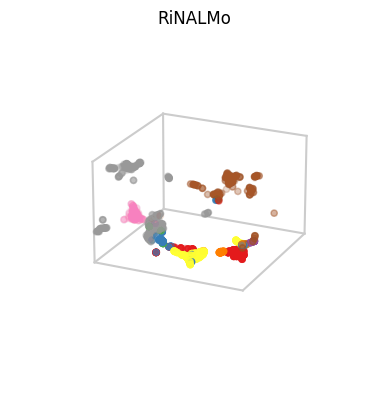

ax.azim 25
ax.elev 22
ylim (-6.91, 24.93)
xlim (-9.18, 23.48)
zlim (-12.39, 23.63)


In [ ]:
plot_embedding(rinalmo_proj, rinalmo_emb_name, rinalmo_fig_path)

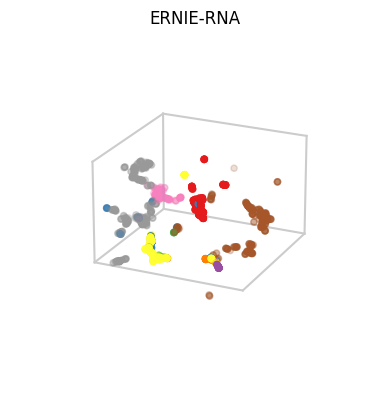

ax.azim 25
ax.elev 22
ylim (-6.91, 24.93)
xlim (-9.18, 23.48)
zlim (-12.39, 23.63)


In [ ]:
plot_embedding(ernierna_proj, ernierna_emb_name, ernierna_fig_path)

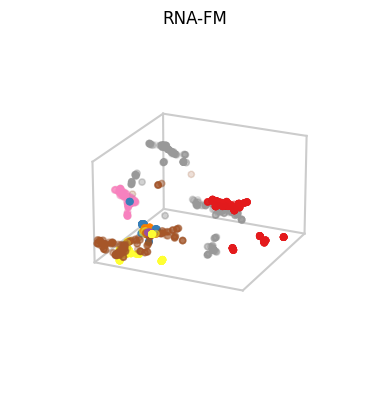

ax.azim 25
ax.elev 22
ylim (-6.91, 24.93)
xlim (-9.18, 23.48)
zlim (-12.39, 23.63)


In [ ]:
plot_embedding(rnafm_proj, rnafm_emb_name, rnafm_fig_path)

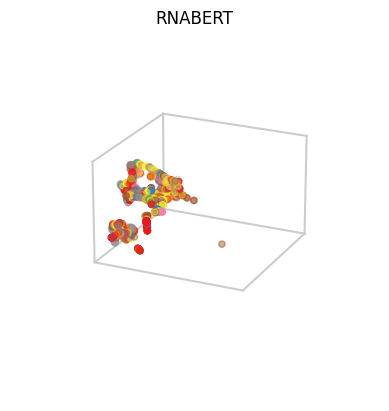

ax.azim 25
ax.elev 22
ylim (-6.91, 24.93)
xlim (-9.18, 23.48)
zlim (-12.39, 23.63)


In [ ]:
plot_embedding(rnabert_proj, rnabert_emb_name, rnabert_fig_path)

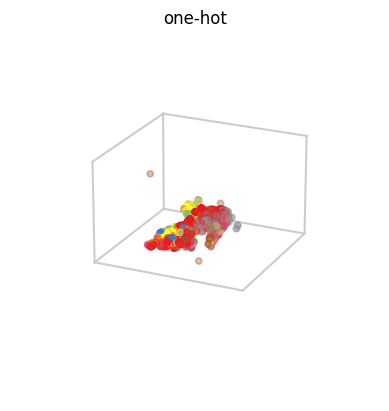

ax.azim 25
ax.elev 22
ylim (-6.91, 24.93)
xlim (-9.18, 23.48)
zlim (-12.39, 23.63)


In [ ]:
plot_embedding(onehot_proj, one_hot_emb_name, one_hot_fig_path)

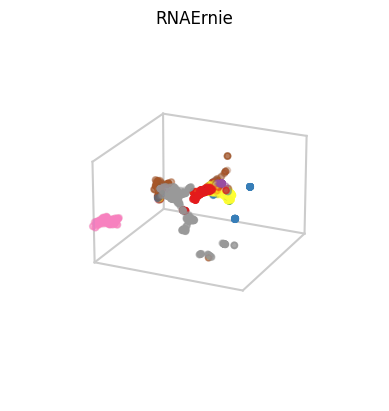

ax.azim 25
ax.elev 22
ylim (-6.91, 24.93)
xlim (-9.18, 23.48)
zlim (-12.39, 23.63)


In [ ]:
plot_embedding(rnaernie_proj, rnaernie_emb_name, rnaernie_fig_path)

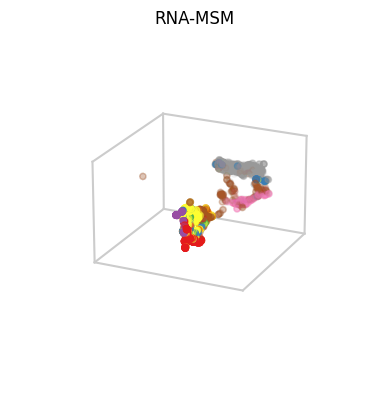

ax.azim 25
ax.elev 22
ylim (-6.91, 24.93)
xlim (-9.18, 23.48)
zlim (-12.39, 23.63)


In [ ]:
plot_embedding(rnamsm_proj, rnamsm_emb_name, rnamsm_fig_path)

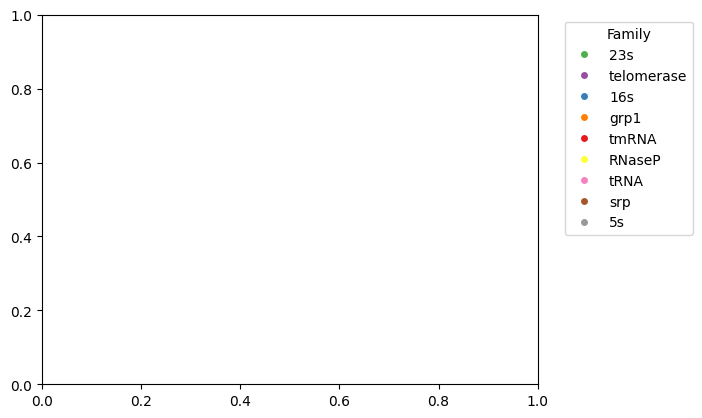

In [ ]:
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=family, markerfacecolor=family_colors[family]) for family in unique_families]

# Add legend
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", handles=legend_handles, title='Family')